In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline
from urllib.parse import urlparse, urlunparse, parse_qs, urlencode

# URL에 쿼리 파라미터를 추가하는 함수
def modify_url(url, params):
    url_parts = list(urlparse(url))
    query = dict(parse_qs(url_parts[4]))
    query.update(params)
    url_parts[4] = urlencode(query, doseq=True)
    return urlunparse(url_parts)

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

raw = pd.read_csv("D:/에어비앤비/파리/listings.csv")
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm','has_availability']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수',
    'has_availability':'예약가능여부'
})


# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")


# 예약 가능여부 f 버리기
df = df.dropna(subset='예약가능여부')
print(f"예약가능여부 : {len(df)}")


# 파라미터 추가
params = {'locale': 'en'}

# 각 URL을 순회하면서 수정
df['url'] = [modify_url(url, params) for url in df['url']]

처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 47841
숙소_유형 제거 : 34280
12개월_리뷰수 0개 제거 : 31052
욕실수, 침실수, 침대수 제거 후 : 30997
리뷰 결측치 제거 후 : 30997
예약가능여부 : 30990


In [5]:
df.isnull().sum()

숙소_id          0
호스트_id         0
슈퍼호스트          0
숙소_수           0
숙소_지역          0
숙소_유형          0
수용_인원수         0
욕실수            0
침실수            0
침대수            0
편의시설           0
숙소_가격          0
최소_숙박일         0
최대_숙박일         0
리뷰수            0
30일_리뷰수        0
리뷰점수           0
숙소_정확성_리뷰점수    0
숙소_청결도_리뷰점수    0
숙소_체크인_리뷰점수    0
숙소_소통_리뷰점수     0
숙소_위치_리뷰점수     0
숙소_가격_리뷰점수     0
평균_리뷰수         0
url            0
숙소_특징          0
12개월_리뷰수       0
예약가능여부         0
dtype: int64

In [9]:
# 카테고리 타입 데이터 비율 및 개수 세는 함수 선언
def CategoricalData_Count_Ratio(name_of_dataframe, name_of_column):

    print(f'전체 숙소 개수: {name_of_dataframe.shape[0]}개')
    print()

    type_list = name_of_dataframe[name_of_column].unique().tolist()

    for type in type_list:
        condition_type = name_of_dataframe[name_of_column] == type
        ratio_type = round((name_of_dataframe[condition_type].shape[0] / name_of_dataframe.shape[0]) * 100, 2)
        print(f'{name_of_column}이 {type}인 숙소의 개수: {name_of_dataframe[condition_type].shape[0]}개')
        print(f'{name_of_column}이 {type}인 숙소의 비율 : {ratio_type}%')
        print()
        
     
        
       

In [7]:
CategoricalData_Count_Ratio(df, '슈퍼호스트')

전체 숙소 개수: 30990개

슈퍼호스트이 t인 숙소의 개수: 10044개
슈퍼호스트이 t인 숙소의 비율 : 32.41%

슈퍼호스트이 f인 숙소의 개수: 20946개
슈퍼호스트이 f인 숙소의 비율 : 67.59%



Text(0.5, 1.0, 'Heatmap of Selected Columns')

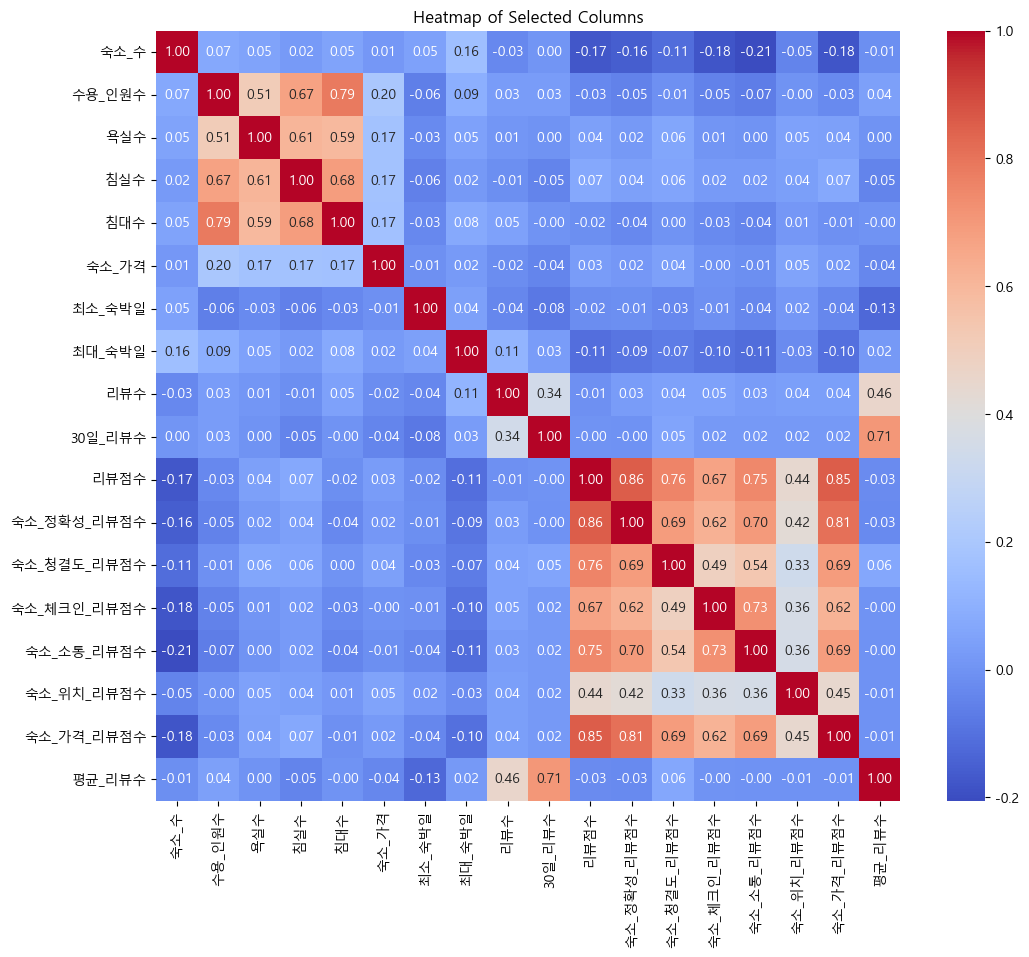

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# 관심 있는 컬럼 선택
selected_columns = df[[ '숙소_수', '수용_인원수', 
                      '욕실수', '침실수', '침대수', '숙소_가격', '최소_숙박일', '최대_숙박일', 
                      '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
                      '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', 
                      '평균_리뷰수']]

# 상관관계 매트릭스 계산
corr_matrix = selected_columns.corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Selected Columns')

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

In [13]:
# 데이터 로드 (예제)
data = pd.DataFrame(df)

# 데이터 살펴보기
print(data.head())

    숙소_id  호스트_id 슈퍼호스트  숙소_수           숙소_지역            숙소_유형  수용_인원수  욕실수  \
1  165409  788732     t   1.0          Temple  Entire home/apt       2  1.0   
2    5396    7903     f   3.0  Hôtel-de-Ville  Entire home/apt       2  1.0   
3  166370  793032     f   3.0        Entrepôt  Entire home/apt       4  1.0   
6    7397    2626     t   9.0  Hôtel-de-Ville  Entire home/apt       4  1.0   
8   41106  177387     t   2.0  Hôtel-de-Ville  Entire home/apt       4  1.0   

   침실수  침대수  ... 숙소_청결도_리뷰점수  숙소_체크인_리뷰점수  숙소_소통_리뷰점수  숙소_위치_리뷰점수  숙소_가격_리뷰점수  \
1  0.0  1.0  ...        4.59         4.87        4.89        4.95        4.74   
2  0.0  1.0  ...        4.57         4.81        4.84        4.96        4.58   
3  1.0  1.0  ...        4.37         4.82        4.79        4.65        4.48   
6  2.0  2.0  ...        4.45         4.91        4.88        4.93        4.73   
8  1.0  2.0  ...        4.65         4.70        4.94        4.96        4.69   

   평균_리뷰수                             

In [14]:
contingency_table = pd.crosstab(data['리뷰점수'], data['숙소_가격'])
print(contingency_table)

숙소_가격  10.0     13.0     18.0     19.0     23.0     24.0     25.0     26.0     \
리뷰점수                                                                            
1.40         0        0        0        0        0        0        0        0   
1.83         0        0        0        0        0        0        0        0   
2.00         0        0        0        0        0        0        0        0   
2.20         0        0        0        0        0        0        0        0   
2.25         0        0        0        0        0        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
4.96         0        0        0        0        0        0        0        0   
4.97         0        0        0        0        0        0        0        0   
4.98         0        0        0        0        0        0        0        0   
4.99         0        0        0        0        0        0        0        0   
5.00         0        0     

In [15]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 119593.76149305531
p-value: 1.0
Degrees of freedom: 150620
Expected frequencies:
 [[3.22684737e-05 3.22684737e-05 3.22684737e-05 ... 3.22684737e-05
  3.22684737e-05 3.22684737e-05]
 [3.22684737e-05 3.22684737e-05 3.22684737e-05 ... 3.22684737e-05
  3.22684737e-05 3.22684737e-05]
 [9.68054211e-05 9.68054211e-05 9.68054211e-05 ... 9.68054211e-05
  9.68054211e-05 9.68054211e-05]
 ...
 [6.67957406e-03 6.67957406e-03 6.67957406e-03 ... 6.67957406e-03
  6.67957406e-03 6.67957406e-03]
 [1.54888674e-03 1.54888674e-03 1.54888674e-03 ... 1.54888674e-03
  1.54888674e-03 1.54888674e-03]
 [1.93804453e-01 1.93804453e-01 1.93804453e-01 ... 1.93804453e-01
  1.93804453e-01 1.93804453e-01]]


연관성o
유의미한 관계x
자유도 높음

In [16]:
contingency_table = pd.crosstab(data['리뷰점수'], data['숙소_가격_리뷰점수'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

숙소_가격_리뷰점수  1.40  1.50  1.67  2.00  2.17  2.25  2.33  2.40  2.50  2.60  ...  \
리뷰점수                                                                    ...   
1.40           1     0     0     0     0     0     0     0     0     0  ...   
1.83           0     0     0     0     1     0     0     0     0     0  ...   
2.00           0     1     0     1     0     0     0     0     0     0  ...   
2.20           0     0     0     0     0     0     0     1     0     0  ...   
2.25           0     0     0     1     0     0     0     0     0     0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
4.96           0     0     0     0     0     0     0     0     0     0  ...   
4.97           0     0     0     0     0     0     0     0     0     0  ...   
4.98           0     0     0     0     0     0     0     0     0     0  ...   
4.99           0     0     0     0     0     0     0     0     0     0  ...   
5.00           0     0     0     0     0     0     0

In [17]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 887492.6558074135
p-value: 0.0
Degrees of freedom: 31790
Expected frequencies:
 [[3.22684737e-05 3.22684737e-05 3.22684737e-05 ... 4.51758632e-04
  3.22684737e-05 9.33204259e-02]
 [3.22684737e-05 3.22684737e-05 3.22684737e-05 ... 4.51758632e-04
  3.22684737e-05 9.33204259e-02]
 [9.68054211e-05 9.68054211e-05 9.68054211e-05 ... 1.35527590e-03
  9.68054211e-05 2.79961278e-01]
 ...
 [6.67957406e-03 6.67957406e-03 6.67957406e-03 ... 9.35140368e-02
  6.67957406e-03 1.93173282e+01]
 [1.54888674e-03 1.54888674e-03 1.54888674e-03 ... 2.16844143e-02
  1.54888674e-03 4.47938045e+00]
 [1.93804453e-01 1.93804453e-01 1.93804453e-01 ... 2.71326234e+00
  1.93804453e-01 5.60482478e+02]]
